<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0039_AluraBB_PrevisaoSeriesTemporaisCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
dados = 'https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/cases-brazil-states.csv'

df_total = pd.read_csv(dados)
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df['data']) # forçando campo 'data' para o formato de data
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

semana                       int64
data                datetime64[ns]
pais                        object
estado                      object
cidade                      object
novosObitos                  int64
Obitos                       int64
novosCasos                   int64
Casos                        int64
obitosMS                     int64
casosMS                      int64
obitos_por_100k            float64
casos_por_100k             float64
obitos_por_casos           float64
recuperados                float64
suspeitos                  float64
testes                     float64
testes_por_100k            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 3960
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   semana            3804 non-null   int64         
 1   data              3804 non-null   datetime64[ns]
 2   pais              3804 non-null   object        
 3   estado            3804 non-null   object        
 4   cidade            3804 non-null   object        
 5   novosObitos       3804 non-null   int64         
 6   Obitos            3804 non-null   int64         
 7   novosCasos        3804 non-null   int64         
 8   Casos             3804 non-null   int64         
 9   obitosMS          3804 non-null   int64         
 10  casosMS           3804 non-null   int64         
 11  obitos_por_100k   3804 non-null   float64       
 12  casos_por_100k    3804 non-null   float64       
 13  obitos_por_casos  3804 non-null   float64       
 14  recuperados       3109 n

# Trabalhando com o estado de SP

In [6]:
df_sp = df[df['estado'] == 'SP' ]
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


# Decomposição

Importando "from statsmodels.tsa_seasonal import seasonal_decompose": isso vai permitir que nós peguemos nossos dados históricos, nossa série histórica e consigamos decompor ela em tendência, sazonalidade, ruído, ver se tem resíduo, etc. <br/>

In [7]:
! pip install statsmodels

In [8]:
from statsmodels.tsa.seasonal import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df_sp.index = pd.to_datetime(df_sp['data'])
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [10]:
resultados = seasonal_decompose(df_sp['novosObitos'], freq=7)
resultados

In [11]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

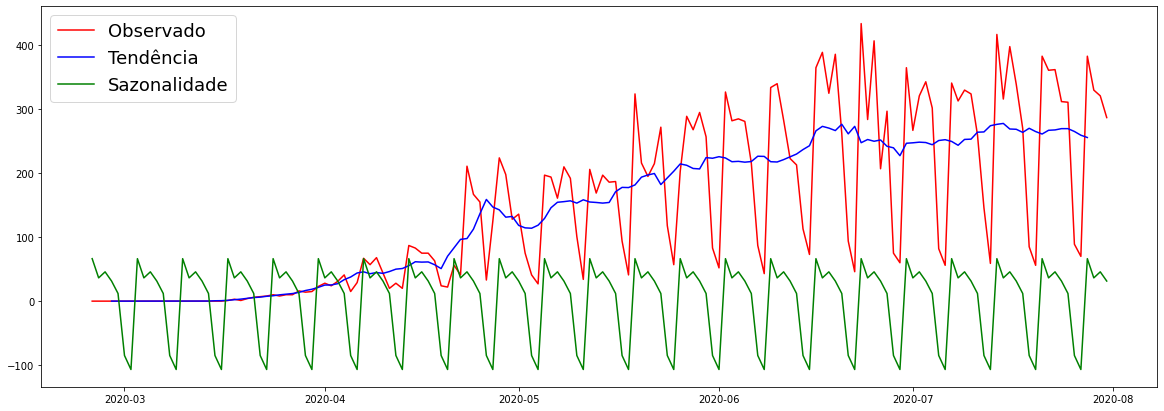

In [12]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'blue', 'green',
       'Observado', 'Tendência', 'Sazonalidade')

In [13]:
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_mg.index = pd.to_datetime(df_mg['data'])
df_rj.index = pd.to_datetime(df_rj['data'])

In [14]:
resultados_mg = seasonal_decompose(df_mg['novosObitos'], freq=7)
resultados_rj = seasonal_decompose(df_rj['novosObitos'], freq=7)

# Comparando SP, RJ e MG

## Tendência

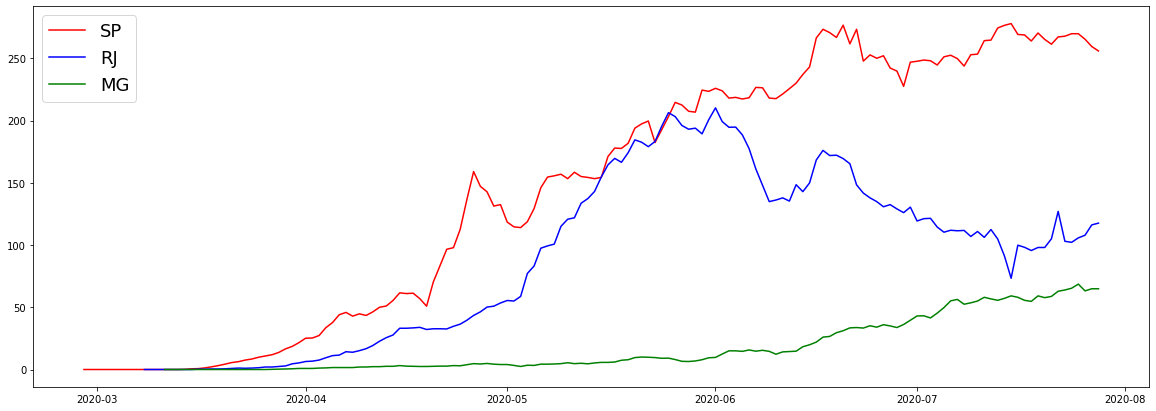

In [15]:
plotar(resultados.trend, resultados_rj.trend, resultados_mg.trend, 'red', 'blue', 'green',
       'SP', 'RJ', 'MG')

## Sazonalidade

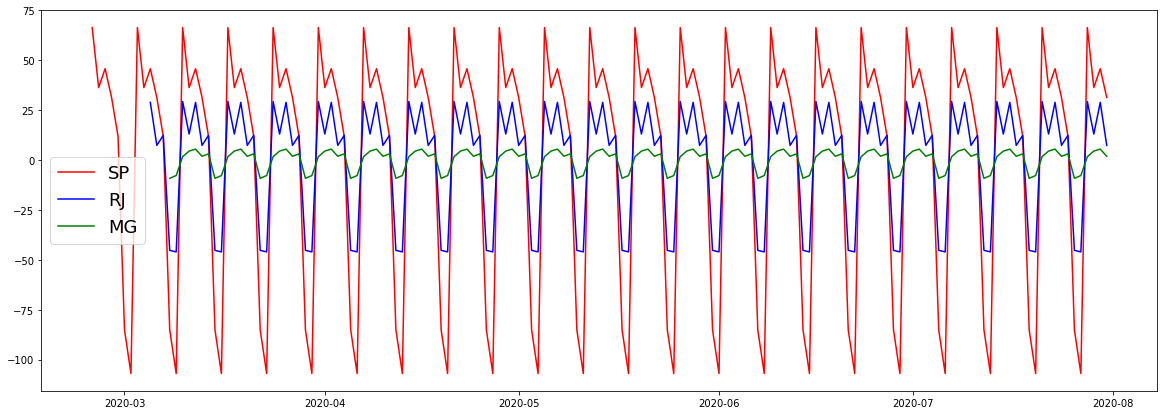

In [16]:
plotar(resultados.seasonal, resultados_rj.seasonal, resultados_mg.seasonal, 'red', 'blue', 'green',
       'SP', 'RJ', 'MG')

# Diferenciação e Autocorrelação

In [17]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(y.dropna()) # o valor-p é o segundo valor

(1.3664743612803478,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 2627.7242380318335)

In [20]:
print('valor-p: ', adfuller(y.dropna())[1])

valor-p:  0.9969563888815705


## Teste Aumented Dickey-Fuller:

**H0**: Série não estacionária; <br/>
**Ha**: (hipótese de pesquisa): Série estacionária. <br/>

Para $\alpha = 0.05$: <br/>

Valor-p = 0.997 então não posso rejeitar H0, assim, concluo que a série é não estacionária.

<br/>

## Veja abaixo:



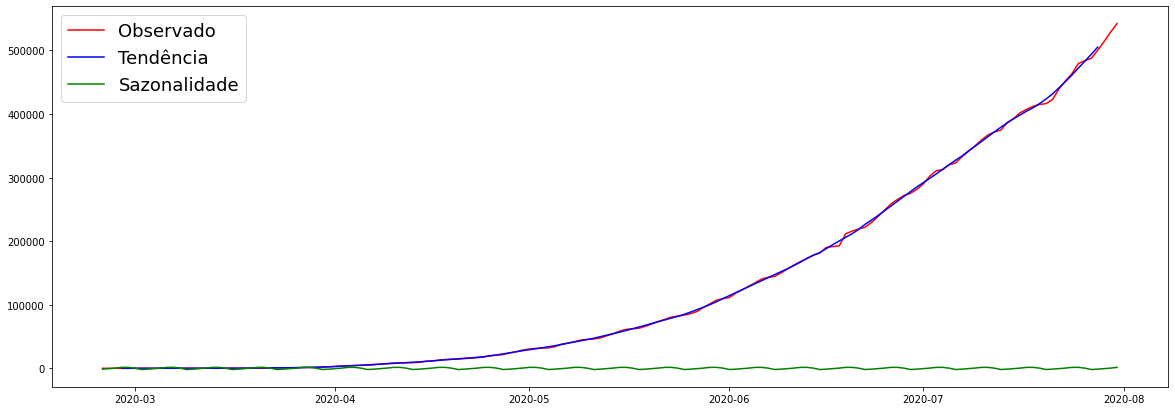

In [21]:
resultados_casos = seasonal_decompose(df_sp['Casos'], freq=7)

plotar(resultados_casos.observed, resultados_casos.trend, resultados_casos.seasonal, 'red', 'blue', 'green',
       'Observado', 'Tendência', 'Sazonalidade')

O gráfico mostra que há uma tendência, portanto a série é **não estacionária**!

# Plot ACF (função de autocorrelação) e PACF (função de autocorrelação parcial)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
def plotarACF(y1, y2, y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title='Série original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title='1ª diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title='2ª diferenciação')

In [24]:
y1 = y # original
y2 = y.diff().dropna() # uma diferenciação
y3 = y.diff().diff().dropna() # duas diferenciações

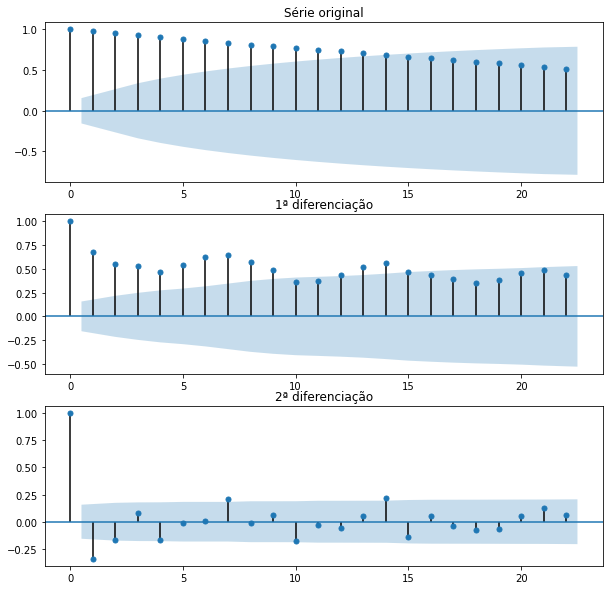

In [25]:
plotarACF(y1, y2, y3)

[06:08] Eu tenho minha função autocorrelação, o que podemos ver? Que nos dados originais os dados são altamente correlacionados, o que era de se esperar. Se olharmos em cima como são os dados, é uma curva, provavelmente exponencial, então o valor que está aqui é altamente correlacionado com o valor que estava um, dois dias atrás. Até vinte dias atrás.

[06:40] Quando aplico a primeira diferenciação, tenho uma diminuição disso. Mas ainda consigo ver esse comportamento oscilatório, que está relacionado à sazonalidade, porque aí a sazonalidade começa a importar um pouco mais, já que você já diminuiu essa magnitude dos seus dados.

[06:58] A segunda diferenciação já não tenho mais esse comportamento repetitivo, mas qual o problema? Se olharmos aqui, tenho agora até uma autocorrelação negativa, de menos 0.25. Isso pode significar que nós diferenciamos demais nossos dados, e é isso que vamos ver no próximo vídeo, como cuidar desse tipo de abordagem.

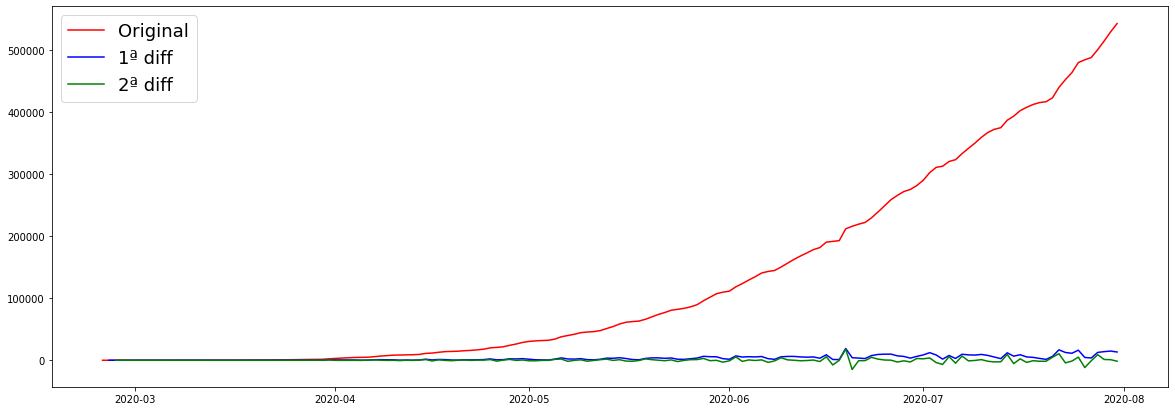

In [26]:
plotar(y1, y2, y3, 'red', 'blue', 'green', 'Original', '1ª diff', '2ª diff')

### ARIMA

Existem diversos algoritmos para que consigamos prever uma série temporal. Ainda não falamos sobre eles, mas existe uma série. Tem o autorregressivo, tem a média móvel, MA, o AR e tal. De forma geral vamos usar um que é uma combinação desses parâmetros, que é o ARIMA.

O **ARIMA** é exatamente um **acrônico** para essa junção do **AR, que é o auto regressive, o MA, que é o moving average, e temos o i, que é exatamente o grau de diferenciação**. Definir se vou diferenciar uma ou duas vezes vai impactar nos parâmetros que vou determinar para o meu modelo.

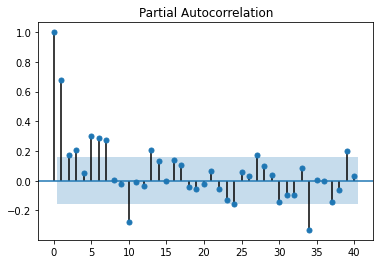

In [27]:
# analisar auto-correlação parcial

plot_pacf(y2,lags=40);

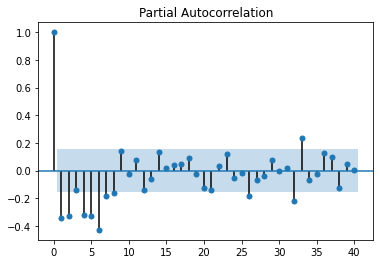

In [28]:
plot_pacf(y3,lags=40);

 Essa é minha autocorrelação parcial. Agora, posso até colocar dois pontos para aparecer só um resultado, vamos fazer a mesma coisa para a segunda diferenciação. Vou colocar diff().diff() e ver o que tenho aqui. Eu de fato gerei uma autocorrelação negativa super grande.

Eu estou manipulando demais os meus dados. Isso tudo nos leva a crer, inclusive ela está até ultrapassando a região azul que é o limite de significância. Significa que de fato estou manipulando demais nossos dados. O que posso dizer para vocês? Menos é mais.

**Parâmetros ARIMA**

Como comentei, o ARIMA tem diversos parâmetros que vamos precisar ajustar. Temos o p, que é relacionado à parte do modelo autorregressivo, temos o q, que é relacionado à parte do moving average e temos o d, que é a parte da diferenciação.


ARIMA(p = 1, d = 1, q = 1) <br/>

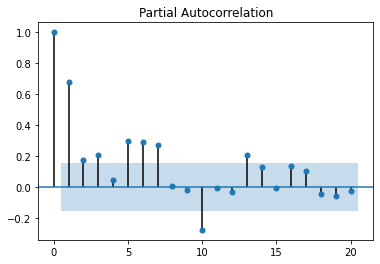

In [29]:
# analisar auto-correlação parcial

plot_pacf(y2,lags=20);

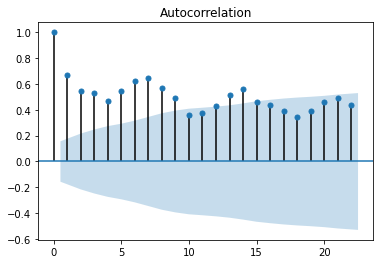

In [30]:
plot_acf(y2);

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
modelo = ARIMA(y, order=(1, 1, 1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary());

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.921
Method:                       css-mle   S.D. of innovations           2589.036
Date:                Wed, 09 Feb 2022   AIC                           2923.842
Time:                        11:28:57   BIC                           2936.067
Sample:                    02-26-2020   HQIC                          2928.807
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4721.3975   4360.472      1.083      0.281   -3824.971    1.33e+04
ar.L1.D.Casos     0.9966      0.005    214.809      0.000       0.988       1.006
ma.L1.D.Casos    -0.8462      0.040    -

 Temos as duas métricas mais importantes, ele me dá o modelo AR, o modelo MA, e as métricas mais importantes são a AIC e a BIC.

 AIC:  basicamente vai comparar o resultado que você obteve e uma métrica de distância entre o resultado que você obteve e o modelo estatístico real.

 BIC: é o critério de informação bayseano vai ser uma estimativa da função de probabilidade do seu modelo, então a probabilidade do seu modelo ser verdadeiro, isso significa por ela ser também uma medida de distância que quanto menor o BIC melhor também.

# ARIMA automático
# SARIMA (ARIMA sazonal)

In [33]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q)) # isso calcula o produto cartesiano

In [34]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [35]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))] # o 7 é porque a sazonalidade ocorre a cada 7 períodos (dias)

In [36]:
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [37]:
print('Exemplo de combinações de parâmetros para o ARIMA Sazonal...')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))

Exemplo de combinações de parâmetros para o ARIMA Sazonal...
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)
SARIMAX: (0, 0, 1) x (0, 0, 0, 7)
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 1, 0) x (0, 1, 0, 7)


In [38]:
y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [39]:
import statsmodels.api as sm

aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, 
                                        order = param,
                                        seasonal_order = param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal,results.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueW

In [40]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4312.204463385908',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC4234.919433193483',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3562.871711196248',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3494.1582680756483',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3852.0136730324284',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3640.4087791638885',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3149.4477404373224',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3148.6560377619494',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC4203.6371531569',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC4186.5789482354285',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3367.092609795821',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3273.051936442009',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC4175.643287398119',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC4177.533546287219',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3194.4015842274694',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3347.988526290513',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3140.724225355021',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3055.298224835011',
 'ARI

Se nós dermos uma olhada em qual o menor aic, vamos ver que o menor aic é obtido com essa combinação de parâmetros que é razoavelmente parecida com a que tínhamos feito manualmente. Mas ainda temos essa parte sazonal. Depois que definimos isso precisamos começar a calcular nosso modelo, então vou fazer o seguinte, vou criar o modelo da mesma forma que eu tinha feito anteriormente dentro do loop, mas agora vai ser nosso modelo final.

Veja abaixo:

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (1,1,1),
                                seasonal_order = (1,1,1,7))
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


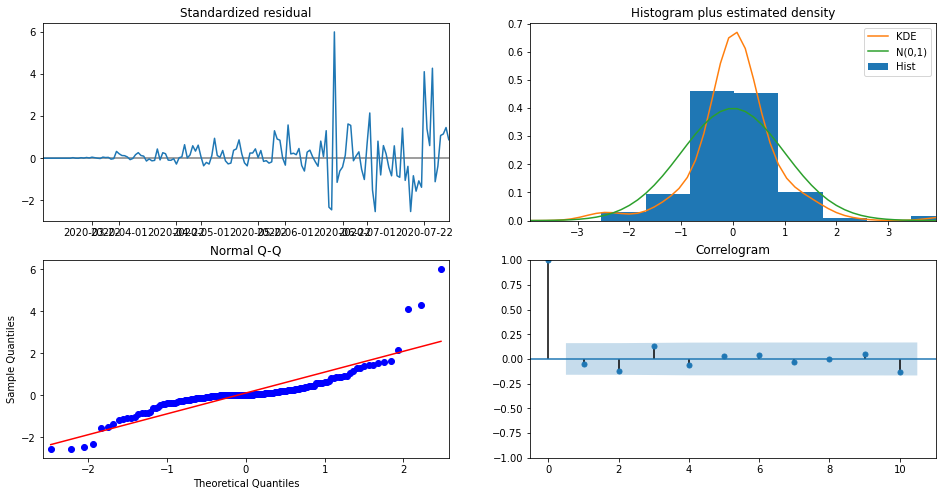

In [42]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

O primeiro gráfico é a quantidade de resíduos em função da série temporal, então podemos ver que em algumas datas específicas temos resíduos maiores ou menores. Isso também está relacionado ao aumento de casos. Se temos mais casos naturalmente a previsão vai ficar um pouco mais complexa, é normal que tenhamos esse aumento dos resíduos.

Também vamos ter o histograma. No histograma vamos ter a distribuição normal, que vai estar em verde, e temos o KDE, o KDE vai ser a distribuição dos meus resíduos, nós queremos que ele se aproxime da normal, porque significa que os resíduos estão normalmente distribuídos.<br/>
Não é o caso dessa série temporal em especial porque ela é muito crescente, nós vimos que ela tem uma tendência de crescimento muito alta, e por esse motivo temos esse aumento. Ele é um pouco mais fino, e tem um spick, ele tem essa amplitude um pouco maior, mas não há tantas deformidades, ele não tem um desvio muito grande à esquerda ou à direita, então ele está razoável.

Também vamos ter o correlograma, onde vamos ver as autocorrelações, podemos perceber que essas seriam as autocorrelações residuais, elas estão extremamente baixas, estão abaixo do 0.25, isso significa que de fato nosso modelo conseguiu transformar nossa série em algo estacionário antes de fazer as previsões.

Por fim temos esse gráfico QQ, o Q é de quantil, é uma medida estatística em que estamos fazendo essa comparação entre quantis, o ideal é que quanto mais próximo nosso modelo dos nossos dados mais esses pontos azuis vão estar na minha linha vermelha. <br/>
O que vemos é que há uma certa variação, óbvio, não vai ser uma previsão perfeita, mas está bem razoável. Nossos resultados estão dentro do esperado e nós vamos na próxima aula começar de fato a fazer uma previsão para o futuro.

# Predição e intervalo de confiança

### Prevendo o "conjunto de treinamento"

In [43]:
# Vamos fazer começar por valores que temos, aquele ideia fundamental da classificação supervisionada... então o início da previsão será em 01/07/2020, 
# já que temos dados até 31/07/2020.

y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ic = pred.conf_int() # computando um intervalo de confiança
pred_ic

,lower Casos,upper Casos
2020-07-01,284123.512728,292788.148842
2020-07-02,293087.153904,301751.787592
2020-07-03,309712.898634,318377.530210
2020-07-04,313808.506408,322473.136147
2020-07-05,314049.635997,322714.264136
2020-07-06,320494.632020,329159.258767
2020-07-07,327045.769052,335710.395638
2020-07-08,336585.456203,345250.081564
2020-07-09,346345.221848,355009.846010
2020-07-10,356625.566523,365290.189642


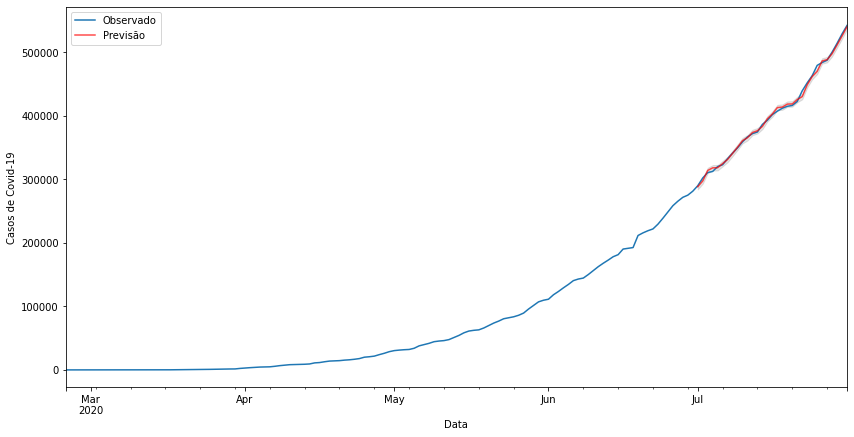

In [45]:
ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de Covid-19')
plt.legend()
plt.show()

### Prevendo o futuro

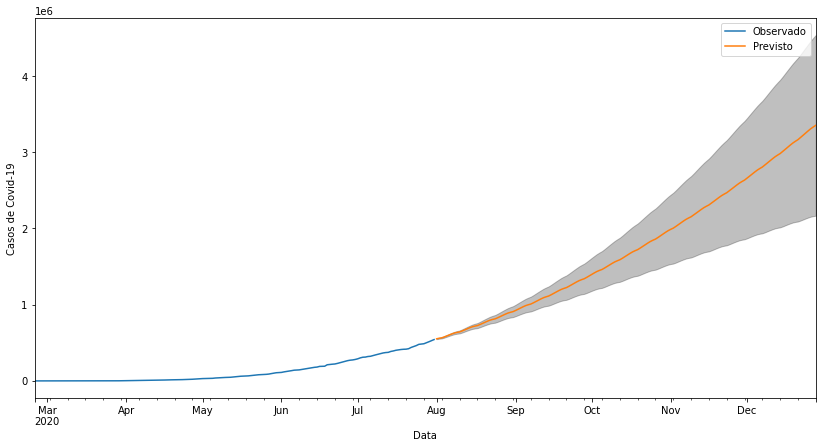

In [46]:
pred_uc = results.get_forecast(150) # 150 dias de predição futura
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de Covid-19')
plt.legend()
plt.show()

In [47]:
pred_ic

,lower Casos,upper Casos
2020-08-01,5.483179e+05,5.569825e+05
2020-08-02,5.535745e+05,5.662494e+05
2020-08-03,5.572363e+05,5.732805e+05
2020-08-04,5.674737e+05,5.866063e+05
2020-08-05,5.795891e+05,6.016630e+05
...,...,...
2020-12-24,2.131286e+06,4.373173e+06
2020-12-25,2.143958e+06,4.417650e+06
2020-12-26,2.155154e+06,4.461262e+06
2020-12-27,2.162485e+06,4.501227e+06


In [48]:
df_att = pd.read_csv('https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/cases-brazil-states-att.csv')
df_att = df_att[df_att['state']=='SP']
df_att = df_att.rename(columns = {'date' : 'data'})
df_att.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [49]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 8551
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   epi_week                         322 non-null    int64  
 1   data                             322 non-null    object 
 2   country                          322 non-null    object 
 3   state                            322 non-null    object 
 4   city                             322 non-null    object 
 5   newDeaths                        322 non-null    int64  
 6   deaths                           322 non-null    int64  
 7   newCases                         322 non-null    int64  
 8   totalCases                       322 non-null    int64  
 9   deathsMS                         322 non-null    int64  
 10  totalCasesMS                     322 non-null    int64  
 11  deaths_per_100k_inhabitants      322 non-null    float64
 12  totalCases_per_100k_i

In [50]:
df_att.data = pd.to_datetime(df_att.data)

In [51]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 8551
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   epi_week                         322 non-null    int64         
 1   data                             322 non-null    datetime64[ns]
 2   country                          322 non-null    object        
 3   state                            322 non-null    object        
 4   city                             322 non-null    object        
 5   newDeaths                        322 non-null    int64         
 6   deaths                           322 non-null    int64         
 7   newCases                         322 non-null    int64         
 8   totalCases                       322 non-null    int64         
 9   deathsMS                         322 non-null    int64         
 10  totalCasesMS                     322 non-null    int64       

In [52]:
df_att = df_att.set_index(df_att.data)

In [53]:
df_att.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


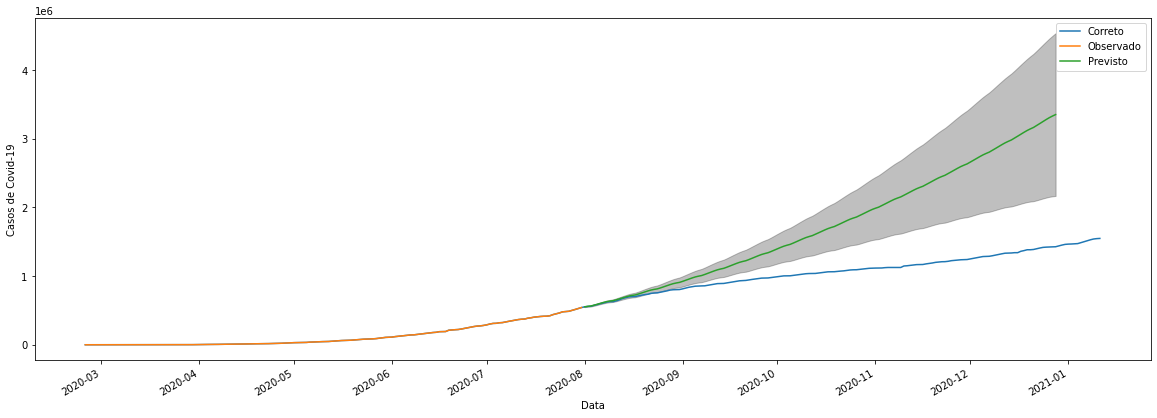

In [54]:
x = df_att['totalCases']
plt.figure(figsize = (20,7))
fig = plt.plot(x, label='Correto')
ax = y.plot(label='Observado')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de Covid-19')
plt.legend()
plt.show()

Vemos que há um certo achatamento na curva, ou seja, isso significa que as ações tomadas nessa época para evitar contágio, para diminuir a circulação de pessoas, todas essas ações de fato deram uma diminuída na quantidade de casos que a princípio teria seguido esse comportamento mais exponencial se não tivéssemos feito nada.<br/>
O que podemos perceber disso é que durante esse primeiro mês de previsão tivemos um comportamento muito parecido. E à medida que o tempo vai passando essa previsão fica um pouco menos correta, porque está mudando o comportamento, tem outras variáveis que implicam, isso é uma questão da série temporal. A série temporal tem características muito voláteis. As coisas vão mudando muito rápido.